# Lecture 05: LDA and Logistic Regression

In [1]:
#Load Packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from scipy import linalg

from sklearn.naive_bayes import GaussianNB
from sklearn.lda import LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.utils import shuffle
from scipy.stats import multivariate_normal
from sklearn.preprocessing import scale

from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
#%matplotlib inline

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
labels=['sr','ob','^g']
colors=['r','b','g']

#Define classifier plotting function
def plot_classifier(x,y,clf,title):

    #Prepare grid for plotting decision surface
    gx1, gx2 = np.meshgrid(np.arange(min(x[:,0]), max(x[:,0]),(max(x[:,0])-min(x[:,0]))/200.0 ),
                         np.arange(min(x[:,1]), max(x[:,1]),(max(x[:,1])-min(x[:,1]))/200.0))
    gx1l = gx1.flatten()
    gx2l = gx2.flatten()
    gx   = np.vstack((gx1l,gx2l)).T

    #Compute a prediction for every point in the grid
    gyhat = clf.predict(gx)
    gyhat = gyhat.reshape(gx1.shape)

    #Plot the results
    for i in [1,2]:
          plt.plot(x[y==i,0],x[y==i,1],labels[i-1]);
    plt.xlabel('area');
    plt.ylabel('compactness');
    plt.pcolormesh(gx1,gx2,gyhat,cmap=cmap_light)
    plt.clim(1,2)
    #plt.colorbar();
    plt.axis('tight');
    plt.title(title);

    
#Define classifier plotting function
def plot_prob_classifier(x,y,clf,title):

    #Prepare grid for plotting decision surface
    gx1, gx2 = np.meshgrid(np.arange(min(x[:,0]), max(x[:,0]),(max(x[:,0])-min(x[:,0]))/200.0 ),
                         np.arange(min(x[:,1]), max(x[:,1]),(max(x[:,1])-min(x[:,1]))/200.0))
    gx1l = gx1.flatten()
    gx2l = gx2.flatten()
    gx   = np.vstack((gx1l,gx2l)).T

    #Compute a prediction for every point in the grid
    gyhat = clf.predict_proba(gx)[:,0]
    gyhat = gyhat.reshape(gx1.shape)

    #Plot the results
    for i in [1,2]:
          plt.plot(x[y==i,0],x[y==i,1],labels[i-1]);
    
    plt.imshow(gyhat, interpolation='nearest',
           extent=(x[:,0].min(), x[:,0].max(), x[:,1].min(), x[:,1].max()), aspect='auto',
           origin='lower', cmap=plt.cm.bwr)
    plt.clim(0,1)
    plt.colorbar();
    contours = plt.contour(gx1, gx2, gyhat, levels=[0.5], linewidths=2,
                       linetypes='-',colors=["k"])    
    
    plt.xlabel('area');
    plt.ylabel('compactness');
    #plt.pcolormesh(gx1,gx2,gyhat,cmap=cmap_light)
    plt.axis('tight');
    plt.title(title);    
    
#Define classifier plotting function
def plot_prob_classifier3d(x,y,clf,title):

    #Prepare grid for plotting decision surface
    gx1, gx2 = np.meshgrid(np.arange(min(x[:,0]), max(x[:,0]),(max(x[:,0])-min(x[:,0]))/200.0 ),
                         np.arange(min(x[:,1]), max(x[:,1]),(max(x[:,1])-min(x[:,1]))/200.0))
    gx1l = gx1.flatten()
    gx2l = gx2.flatten()
    gx   = np.vstack((gx1l,gx2l)).T

    #Compute a prediction for every point in the grid
    gyhat = clf.predict_proba(gx)[:,0]
    gyhat = gyhat.reshape(gx1.shape)

    #Plot the results
    for i in [1,2]:
          plt.gca().scatter(x[y==i,0],x[y==i,1],zs=-0.25, c=colors[i-1]);
    
    plt.gca().plot_surface(gx1,gx2,gyhat,cmap=plt.cm.bwr, alpha=0.5, vmin=0,vmax=1)
    plt.clim(0,1)
    plt.gca().set_zlim3d(bottom=0, top=1)
    
    plt.xlabel('area');
    plt.ylabel('compactness');
    plt.gca().set_zlabel('prob.')
    plt.axis('tight');
    plt.title(title);    
    
    
#Define data plotting function
def plot_data(x,y,title):
    #Plot the results
    for i in [1,2]:
          plt.plot(x[y==i,0],x[y==i,1],labels[i-1]);
    #plt.colorbar();
    plt.axis('tight');
    plt.xlabel('area');
    plt.ylabel('compactness');
    plt.title(title);    

    
#Define classifier plotting function
def plot_gaussian(x,y,mean,cov,color):

    #Prepare grid for plotting decision surface
    gx1, gx2 = np.meshgrid(np.arange(min(x[:,0]), max(x[:,0]),(max(x[:,0])-min(x[:,0]))/200.0 ),
                         np.arange(min(x[:,1]), max(x[:,1]),(max(x[:,1])-min(x[:,1]))/200.0))
    gx1l = gx1.flatten()
    gx2l = gx2.flatten()
    gx   = np.vstack((gx1l,gx2l)).T

    #Compute a prediction for every point in the grid
    gyhat = multivariate_normal.pdf(gx, mean=mean, cov=cov)
    gyhat = gyhat.reshape(gx1.shape)
    
    plt.gca().plot_surface(gx1,gx2,gyhat,color=color,alpha=0.5)
    
    plt.xlabel('area');
    plt.ylabel('compactness');
    plt.axis('tight');
    

    
#Define ellipse plotting function    
def plot_ellipse(mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / (u[0]+1e-10))
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = matplotlib.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, color=color)
    ell.set_clip_box(plt.gca().bbox)
    ell.set_alpha(0.5)
    plt.gca().add_artist(ell)

    
def plot_ccg(x,y,clf,title):
    plot_data(x,y,"")
    for i in range(2):
        mu = clf.means_[i,:]
        Sigma = clf.covariance_
        plot_ellipse(mu,Sigma,colors[i])
    plt.title(title)    
    

/opt/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/anaconda/lib/python2.7/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


Load Data
===

In [2]:
#Load seeds data, but only keep classes 2 and 3
data = np.loadtxt('../data/seeds_dataset.txt')
x = data[:,[0,2]]
y = data[:,-1]

x=x[y!=2,:]
y=y[y!=2]
y[y==3]=2

x2=scale(x,with_mean=False)


# Linear Discriminant Analysis

<IPython.core.display.Javascript object>


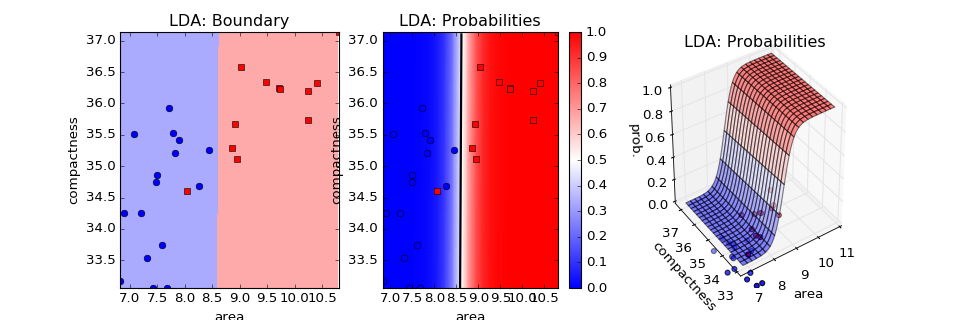

<IPython.core.display.Javascript object>


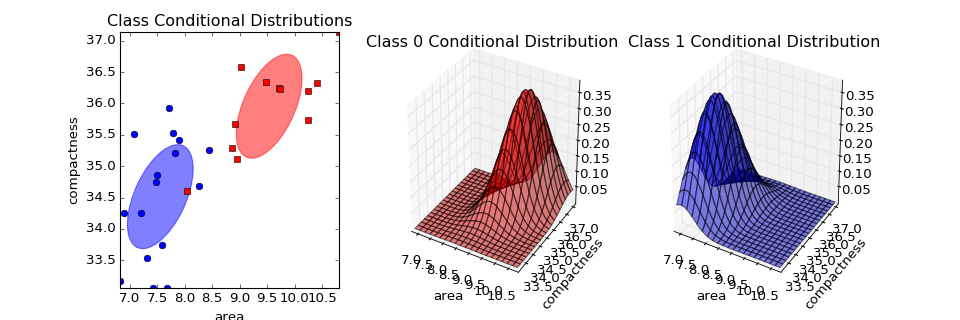

In [13]:
x_tr, x_te, y_tr, y_te = train_test_split(x2,y,test_size=0.80,random_state=0)


clf = LDA(store_covariance=True)
clf.fit(x_tr, y_tr)

#Plot the boundaries
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plot_classifier(x_tr,y_tr,clf,'LDA: Boundary')

#Plot the probabilities
plt.subplot(1,3,2)
plot_prob_classifier(x_tr,y_tr,clf,'LDA: Probabilities')

plt.subplot(1,3,3,projection='3d')
plot_prob_classifier3d(x_tr,y_tr,clf,'LDA: Probabilities')

#Plot the class conditional densities
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plot_ccg(x_tr,y_tr,clf,"Class Conditional Distributions")

plt.subplot(1,3,2, projection='3d')
mu = clf.means_[0,:]
Sigma = clf.covariance_
plot_gaussian(x_tr,y_tr,mu,Sigma,colors[0])
plt.title("Class 0 Conditional Distribution")

plt.subplot(1,3,3, projection='3d')
mu = clf.means_[1,:]
Sigma = clf.covariance_
plot_gaussian(x_tr,y_tr,mu,Sigma,colors[1])
plt.title("Class 1 Conditional Distribution")
    
plt.show()

# Logisitc Regression

<IPython.core.display.Javascript object>


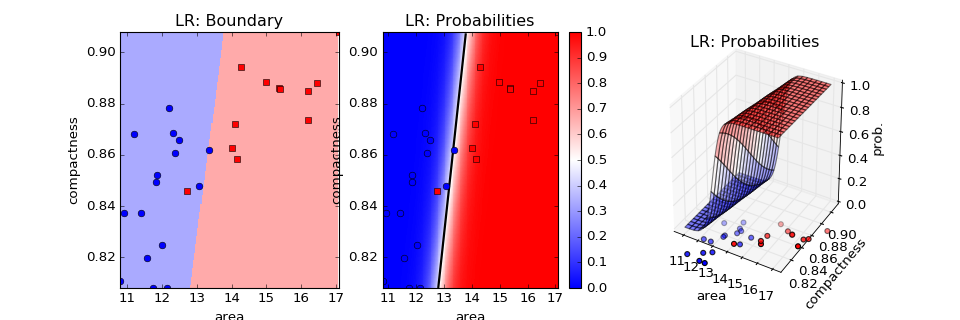

In [14]:
x_tr, x_te, y_tr, y_te = train_test_split(x,y,test_size=0.80,random_state=0)

clf = linear_model.LogisticRegression(C=1e6)
clf.fit(x_tr, y_tr)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plot_classifier(x_tr,y_tr,clf,'LR: Boundary')

plt.subplot(1,3,2)
plot_prob_classifier(x_tr,y_tr,clf,'LR: Probabilities')

plt.subplot(1,3,3,projection='3d')
plot_prob_classifier3d(x_tr,y_tr,clf,'LR: Probabilities')


plt.show()

Regularization for LDA
===

<IPython.core.display.Javascript object>


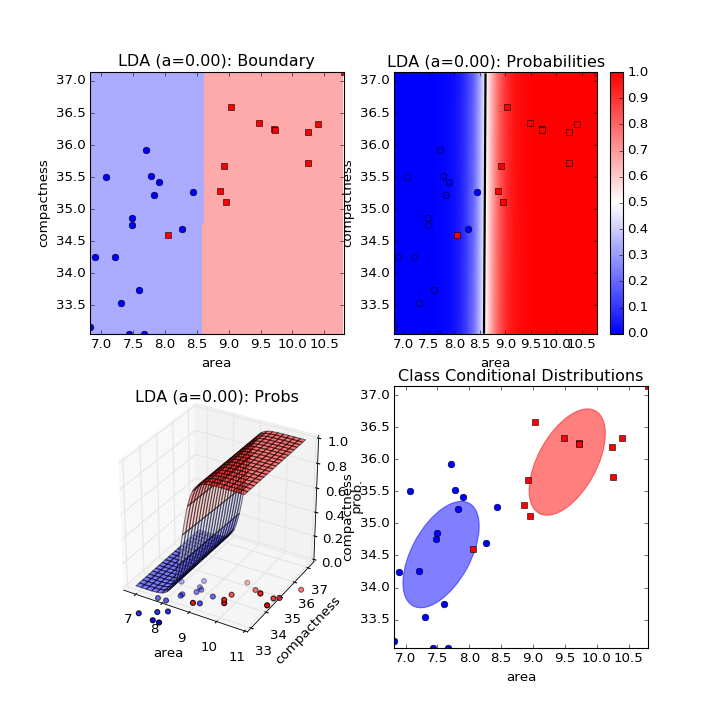

<IPython.core.display.Javascript object>


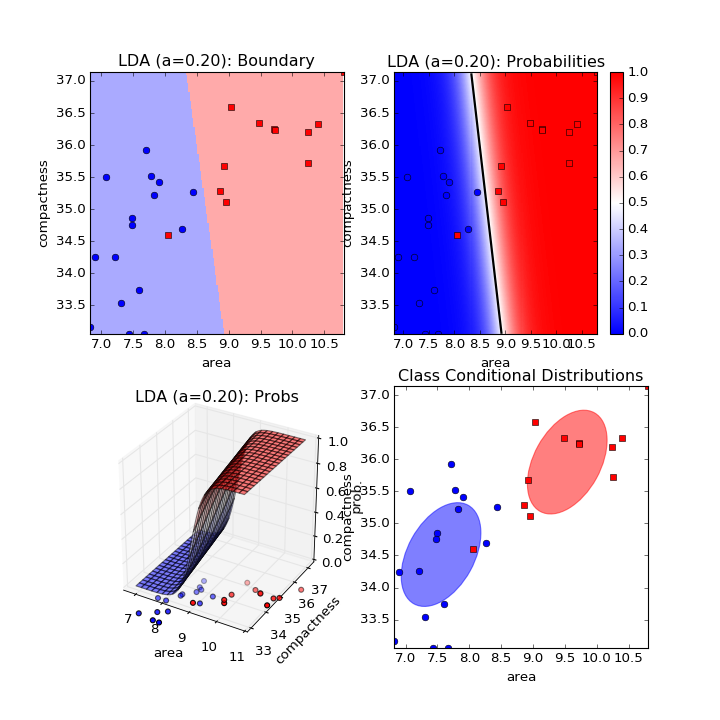

<IPython.core.display.Javascript object>


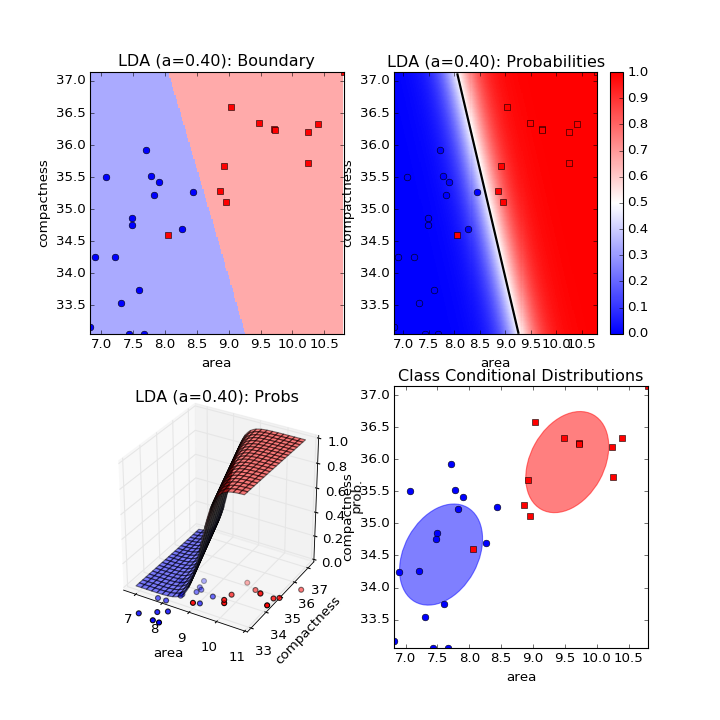

<IPython.core.display.Javascript object>


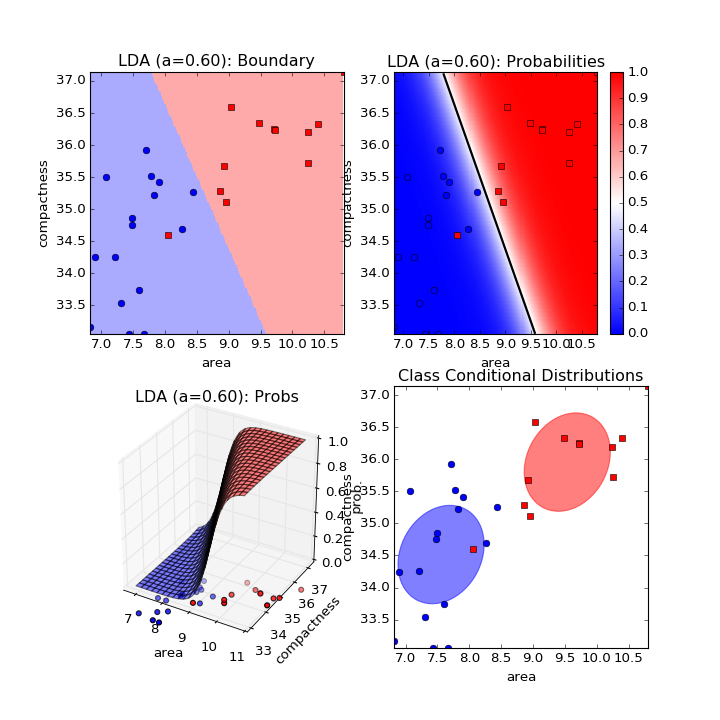

<IPython.core.display.Javascript object>


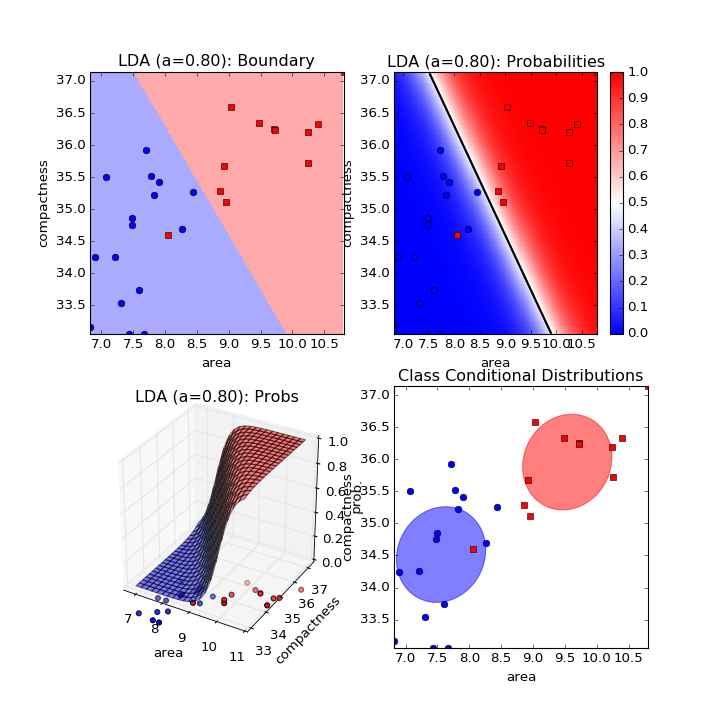

<IPython.core.display.Javascript object>


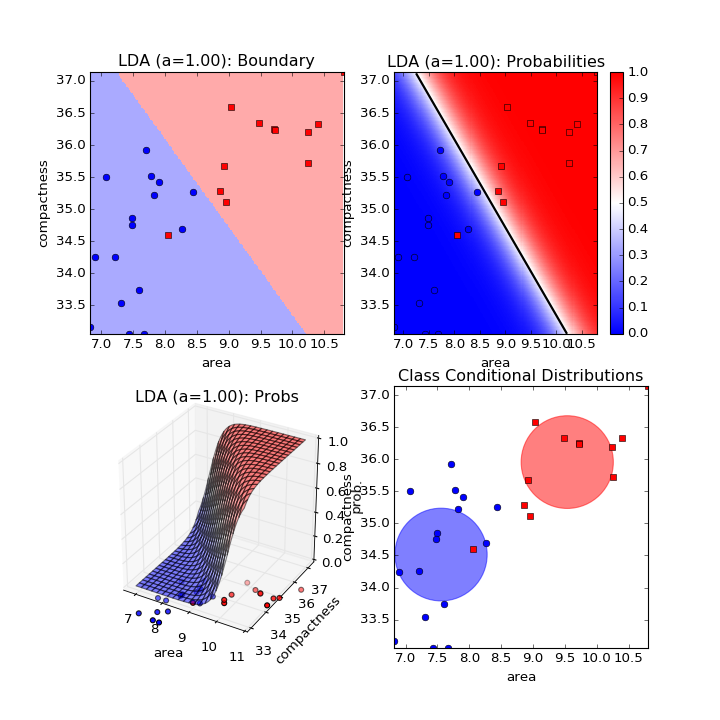

<IPython.core.display.Javascript object>


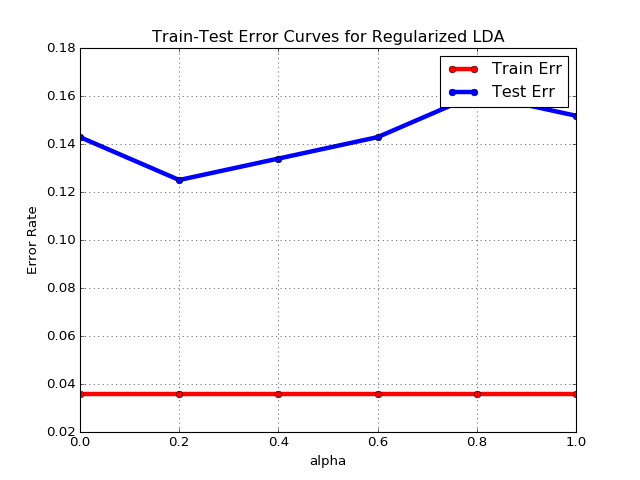

In [16]:
x_tr, x_te, y_tr, y_te = train_test_split(x2,y,test_size=0.80,random_state=0)

#Set regularization values to evaluate
alphas = np.linspace(0,1,6)
errs   = np.zeros((len(alphas),3))

for i,alpha in enumerate(alphas):
    
    #Fit the model
    clf = LDA(store_covariance=True, shrinkage=alpha, solver='lsqr')
    clf.fit(x_tr, y_tr)
    
    #Compute train and test errors                                  
    errs[i,0]=1-clf.score(x_tr,y_tr)  
    errs[i,1]=1-clf.score(x_te,y_te)
   
    #Plot the classifer maps
    plt.figure(figsize=(9,9))
    plt.subplot(2,2,1)
    plot_classifier(x_tr,y_tr,clf,'LDA (a=%.2f): Boundary'%(alpha))
    plt.subplot(2,2,2)
    plot_prob_classifier(x_tr,y_tr,clf,'LDA (a=%.2f): Probabilities'%(alpha))
    plt.subplot(2,2,3,projection='3d')
    plot_prob_classifier3d(x_tr,y_tr,clf,'LDA (a=%.2f): Probs'%(alpha)) 
    plt.subplot(2,2,4)
    plot_ccg(x_tr,y_tr,clf,"Class Conditional Distributions")
    
    plt.show()
    
#Plot the summary results
plt.figure()
plt.plot(alphas, errs[:,0], 'or-', linewidth=4)
plt.plot(alphas, errs[:,1], 'ob-', linewidth=4)
plt.grid(True)
plt.xlabel("alpha")
plt.ylabel("Error Rate")
plt.title("Train-Test Error Curves for Regularized LDA")
plt.legend(["Train Err","Test Err"]);
plt.show()


Regularization for Logistic Regression
===

<IPython.core.display.Javascript object>


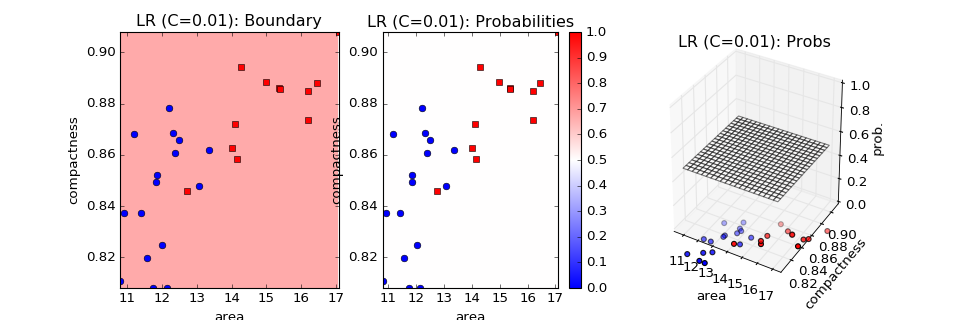

<IPython.core.display.Javascript object>


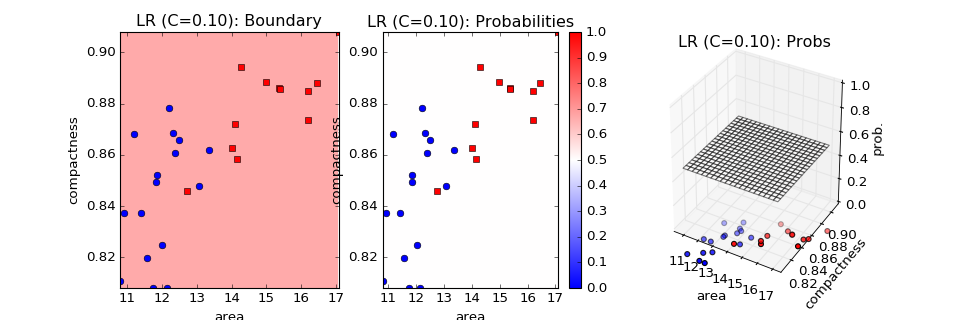

<IPython.core.display.Javascript object>


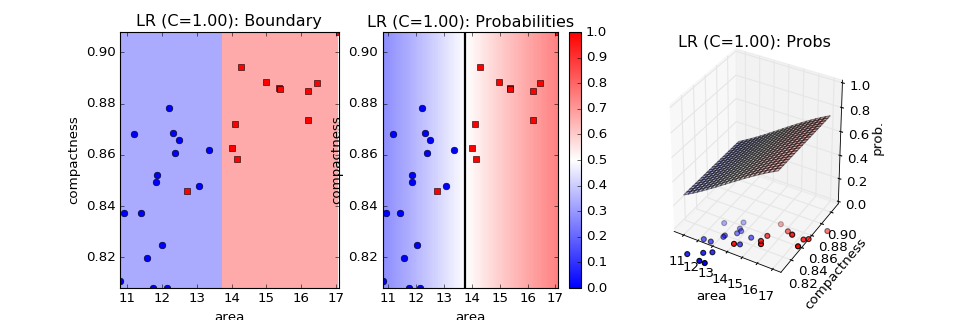

<IPython.core.display.Javascript object>


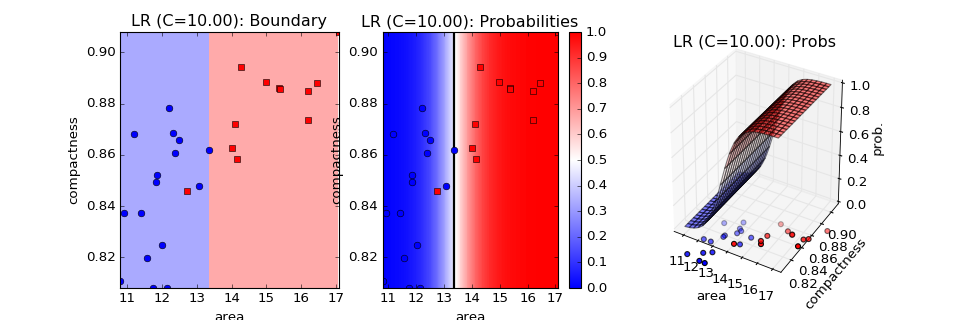

<IPython.core.display.Javascript object>


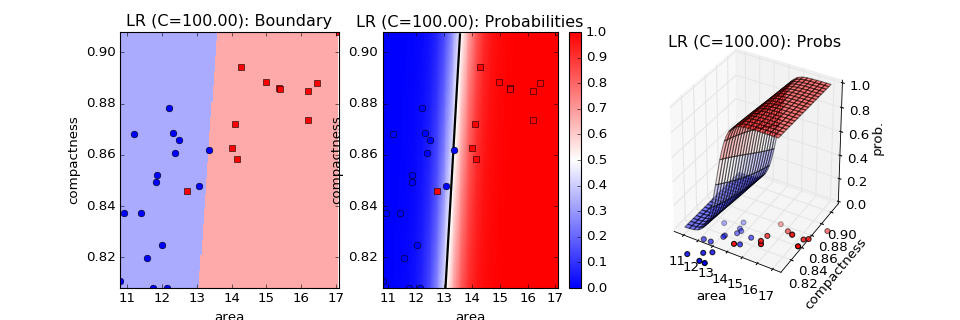

<IPython.core.display.Javascript object>


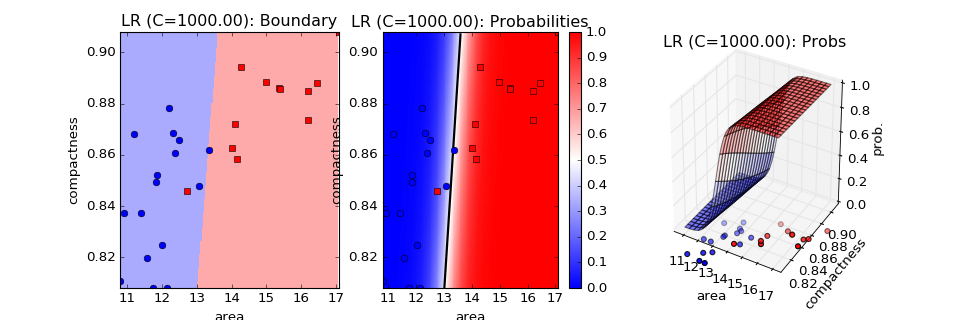

<IPython.core.display.Javascript object>


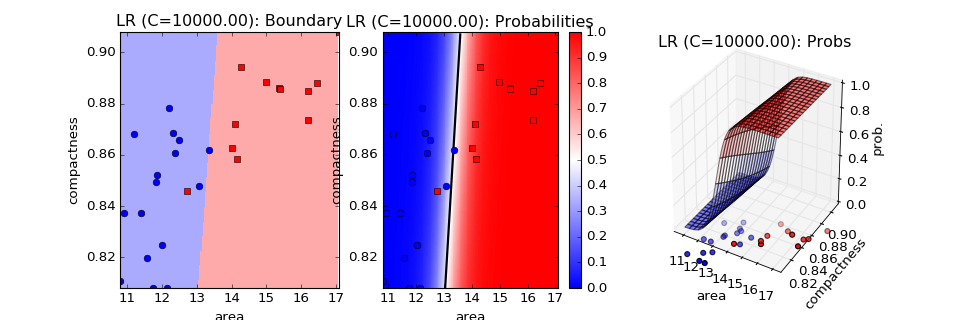

<IPython.core.display.Javascript object>


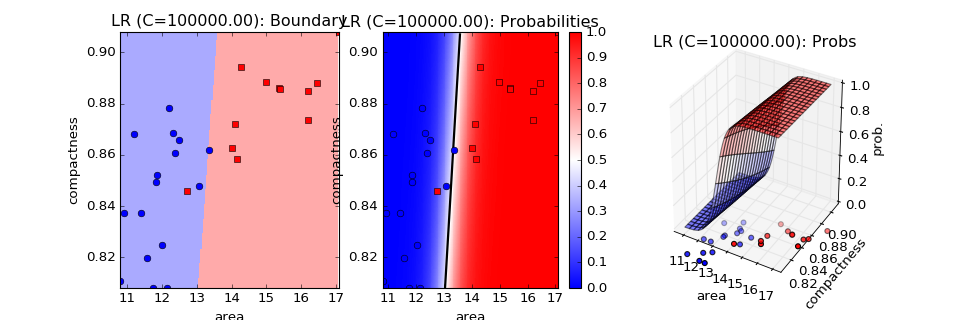

<IPython.core.display.Javascript object>


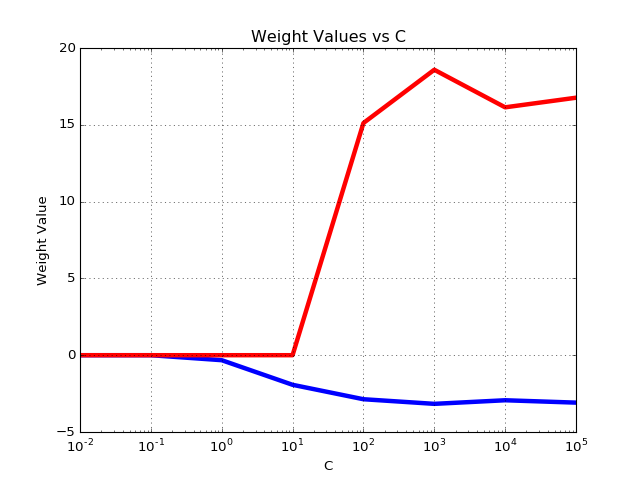

<IPython.core.display.Javascript object>


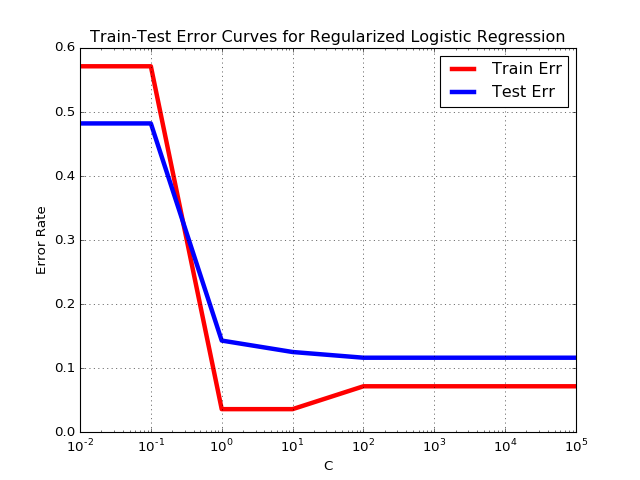

In [17]:
x_tr, x_te, y_tr, y_te = train_test_split(x,y,test_size=0.80,random_state=0)

#Set regularization values to evaluate
Cs     = 10**np.linspace(-2,5, 8)
errs   = np.zeros((len(Cs),3))
Ws     = np.zeros((len(Cs),2))

for i,c in enumerate(Cs):
    
    #Fit the model
    clf = linear_model.LogisticRegression(C=c, penalty='l1')
    clf.fit(x_tr, y_tr)
    
    #Compute train and test errors                                  
    errs[i,0]=1-clf.score(x_tr,y_tr)  
    errs[i,1]=1-clf.score(x_te,y_te)
    #Compute norm of weight vector
    Ws[i,:] = clf.coef_  
    
    #Plot the classifer maps
    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1)
    plot_classifier(x_tr,y_tr,clf,'LR (C=%.2f): Boundary'%(c))
    plt.subplot(1,3,2)
    plot_prob_classifier(x_tr,y_tr,clf,'LR (C=%.2f): Probabilities'%(c))
    plt.subplot(1,3,3,projection='3d')
    plot_prob_classifier3d(x_tr,y_tr,clf,'LR (C=%.2f): Probs'%(c)) 
    plt.show()
    
#Plot the summary results
plt.figure()
plt.semilogx(Cs, Ws[:,0], 'b-', linewidth=4)
plt.semilogx(Cs, Ws[:,1], 'r-', linewidth=4)
plt.grid(True)
plt.xlabel("C")
plt.ylabel("Weight Value")
plt.title("Weight Values vs C");
plt.show()   

plt.figure()
plt.semilogx(Cs, errs[:,0], 'r-', linewidth=4)
plt.semilogx(Cs, errs[:,1], 'b-', linewidth=4)
plt.grid(True)
plt.xlabel("C")
plt.ylabel("Error Rate")
plt.title("Train-Test Error Curves for Regularized Logistic Regression")
plt.legend(["Train Err","Test Err"]);
plt.show()

 